* Mujoco 실행 및 변수 확인용

필요 패키지 삽입

In [1]:
import horcrux_terrain_v1
import gymnasium as gym
import numpy as np
import pandas as pd

import os
import pathlib
import time
import mediapy as media

import matplotlib.pyplot as plt

from gymnasium.utils.save_video import save_video

ENV 생성

In [2]:
env = gym.make("horcrux_terrain_v1/plane-v1", 
                terminate_when_unhealthy = False, 
                # render_mode = "rgb_array", 
                render_mode = "human", 
                # render_camera_name = 'ceiling', 
                use_gait = True,
                gait_params = (30,30,60,60,45),
                rotation_norm_cost_weight = 1,) 

_ = env.reset()
t_now = time.time()

for j in range(2):
    com_x = np.empty((0,1))
    com_x2 = np.empty((0,1))
    com_y = np.empty((0,1))
    com_y2 = np.empty((0,1))
    com_z = np.empty((0,1))
    com_z2 = np.empty((0,1))
    for i in range(100):
        while (time.time() - t_now) < 0.1:
            pass  
        t_now = time.time()

        random = np.ones(14) * 1.0

        obs, rew, terminated, _, info = env.step(random)

        com_x = np.vstack((com_x, info['init_com'][0]))
        com_y = np.vstack((com_y, info['init_com'][1]))
        com_z = np.vstack((com_z, info['init_com'][2]))

        com_x2 = np.vstack((com_x2, info['com_pos'][0]))
        com_y2 = np.vstack((com_y2, info['com_pos'][1]))
        com_z2 = np.vstack((com_z2, info['com_pos'][2]))

        if terminated:
            env.reset()
            print("terminated")
        
        pixels = env.render()
        # print(info["reward_straightness"])

    env.reset()

env.close()

데이터 플롯

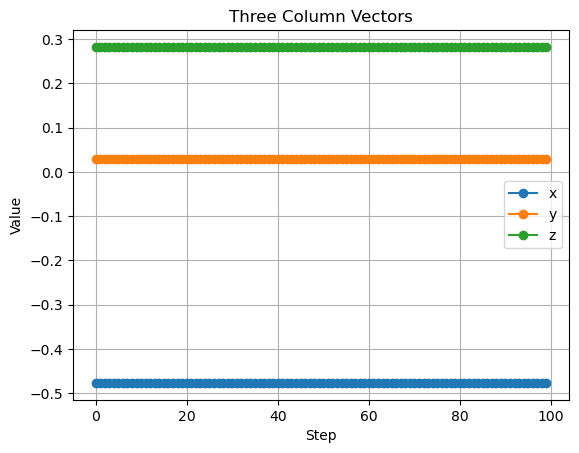

In [3]:

indices = np.arange(len(com_x))

plt.figure()
plt.plot(indices, com_x, label='Vector a', marker='o')
plt.plot(indices, com_y, label='Vector b', marker='o')
plt.plot(indices, com_z, label='Vector c', marker='o')

# 라벨과 제목 추가
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Three Column Vectors')
plt.legend(["x", "y", "z"])
plt.grid(True)

# 플롯 보여주기
plt.show()


In [ ]:
np.mean(com_x)

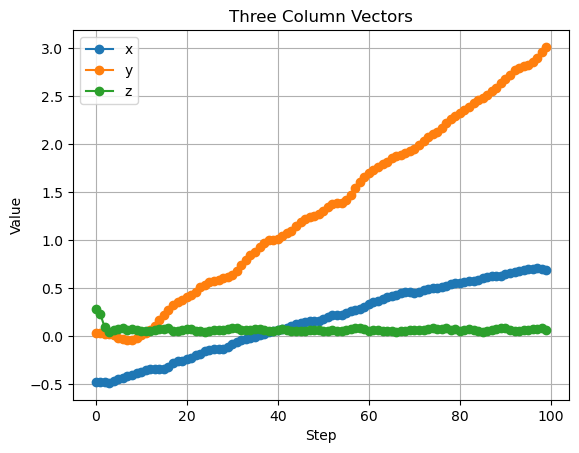

In [4]:

indices = np.arange(len(com_x))

plt.figure()
plt.plot(indices, com_x2, label='Vector a', marker='o')
plt.plot(indices, com_y2, label='Vector b', marker='o')
plt.plot(indices, com_z2, label='Vector c', marker='o')

# 라벨과 제목 추가
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Three Column Vectors')
plt.legend(["x", "y", "z"])
plt.grid(True)

# 플롯 보여주기
plt.show()